# Holdout method aka. train (valid) test split

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

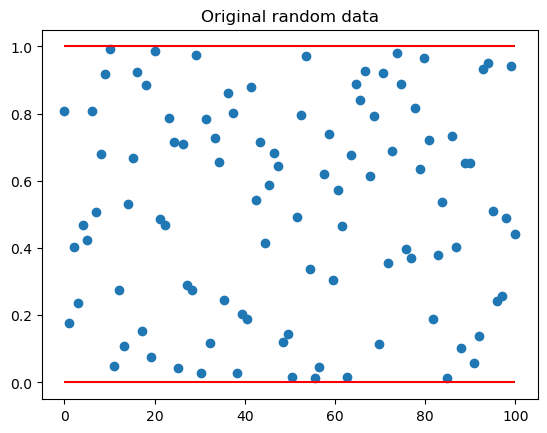

In [14]:
arr = np.random.random_sample(100)
plt.scatter(np.linspace(0,len(arr),len(arr)),arr)
plt.title("Original random data")
plt.hlines(0,0,100,color='red')
plt.hlines(1,0,100,color='red')
plt.show()

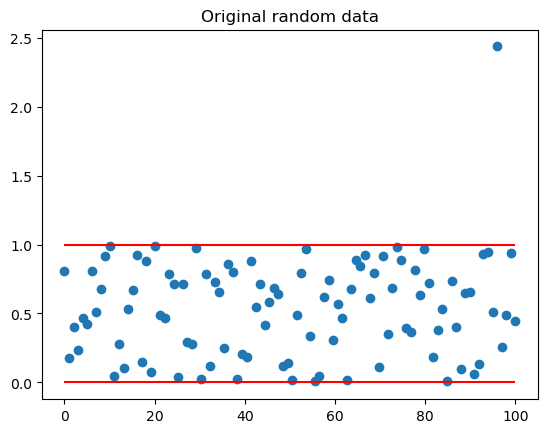

In [15]:
arr[95] = 10*arr[95]
plt.scatter(np.linspace(0,len(arr),len(arr)),arr)
plt.title("Original random data")
plt.hlines(0,0,100,color='red')
plt.hlines(1,0,100,color='red')
plt.show()

In [21]:
arr = arr.reshape(-1,1)
X_train, X_test = train_test_split(arr, test_size=0.1, random_state=123, shuffle=False)

print("Train shape:",X_train.shape, "Test shape:",X_test.shape)

scaler = MinMaxScaler()
scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

print("Scale :",scaler.scale_)

Train shape: (90, 1) Test shape: (10, 1)
Scale : [1.02042878]


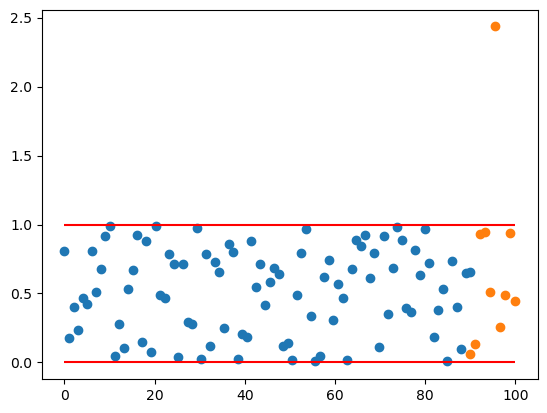

In [22]:
plt.scatter(np.linspace(0,len(X_train),len(X_train)),X_train)
plt.scatter(np.linspace(90,len(X_test)+90,len(X_test)),X_test)
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')
plt.show()

In [23]:
X_train, X_test = train_test_split(arr, test_size=0.1, random_state=123, shuffle=False)

scaler_test = MinMaxScaler()
scaler_test.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler_test.transform(X_test)

print("Scale:",scaler_test.scale_)

Scale: [0.42058603]


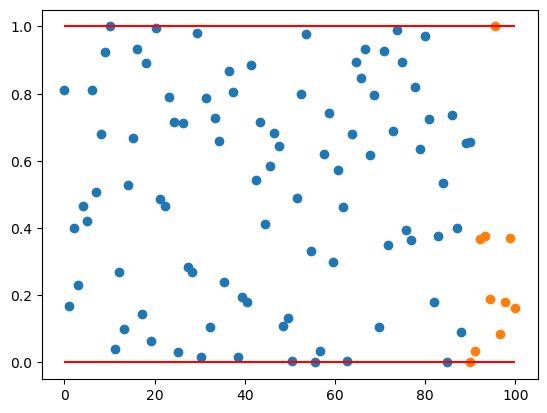

In [24]:
plt.scatter(np.linspace(0,len(X_train),len(X_train)),X_train)
plt.scatter(np.linspace(90,len(X_test)+90,len(X_test)),X_test)
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')
plt.show()

In [25]:
X_train, X_test = train_test_split(arr, test_size=0.1, random_state=123, shuffle=False)

scaler_full = MinMaxScaler()
print("Fitting scaler on the whole data and using it to normalize train and test...")
scaler_full.fit(arr)
X_train = scaler_full.transform(X_train)
X_test = scaler_full.transform(X_test)

print("Scale:",scaler_full.scale_)

Fitting scaler on the whole data and using it to normalize train and test...
Scale: [0.41260968]


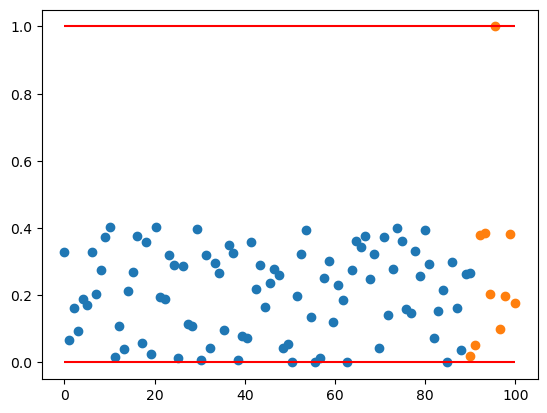

In [26]:
plt.scatter(np.linspace(0,len(X_train),len(X_train)),X_train)
plt.scatter(np.linspace(90,len(X_test)+90,len(X_test)),X_test)
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')
plt.show()

# Crossvalidation in Scikit

In [45]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, make_scorer

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, 
                                                    test_size=0.1, random_state=123, shuffle=True)

In [42]:
model_svm = svm.SVC(C=100, gamma=1)

kfold = KFold(n_splits=2,random_state=13,shuffle=True)

cross_val_scores = cross_val_score(model_svm, X_train, y_train, cv=kfold, scoring='accuracy')

print("Mean accuracy in crossvalidation: ", str(cross_val_scores.mean()),"\n")

Mean accuracy in crossvalidation:  0.9483099209833188 



In [43]:
model_svm.fit(X_train, y_train)

test_predictions = model_svm.predict(X_test)

print(classification_report(y_test, test_predictions, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.75      0.60      0.67         5
   virginica       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



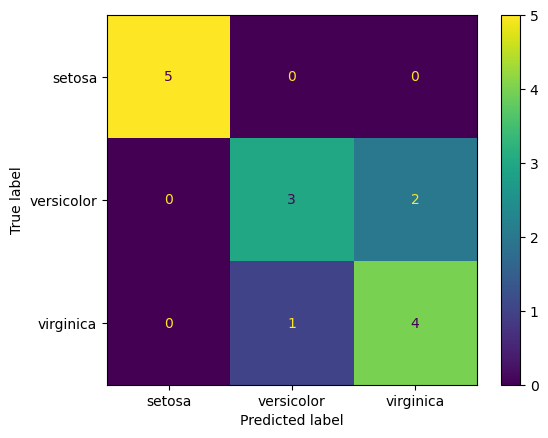

In [44]:
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=iris.target_names)
disp.plot();

# Multiple metrics, Fit times

In [51]:
cross_val_scores = cross_validate(model_svm, X_train, y_train, cv=kfold, 
                                 scoring={'accuracy':'accuracy',
                                         'f1_weighted':make_scorer(f1_score,greater_is_better=True,average='weighted'),
                                         'f1_macro':make_scorer(f1_score,greater_is_better=True,average='macro')})

print("Mean metrics in crossvalidation:")
display({k: cross_val_scores[k].mean() for k in cross_val_scores.keys()})

Mean metrics in crossvalidation:


{'fit_time': 0.007815957069396973,
 'score_time': 0.013307332992553711,
 'test_accuracy': 0.9483099209833188,
 'test_f1_weighted': 0.9483715808673981,
 'test_f1_macro': 0.9492525749703764}

# The train and test samples in Cross Validation

Use the .split() method of the CV splitter which iterates over train, test indices 

In [60]:
import pandas as pd

i = 0
for train_index, test_index in kfold.split(X_train):
    i += 1
    print(f'*** Fold{i} ***')
    
    X_tr, X_val = X_train[train_index], X_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    
    print("* train set:")
    tmp = pd.concat([pd.DataFrame(X_tr, index=train_index), pd.Series(y_tr, index=train_index, name="target")], axis=1)
    tmp.index.name = "sample index"
    display(tmp)
    print("* validation set:")
    tmp = pd.concat([pd.DataFrame(X_val, index=test_index), pd.Series(y_val, index=test_index, name="target")], axis=1)
    tmp.index.name = "sample index"
    display(tmp)
    print()

*** Fold1 ***
* train set:


,0,1,2,3,target
sample index,,,,,
0,5.0,3.2,1.2,0.2,0
1,5.1,3.8,1.9,0.4,0
2,6.4,2.8,5.6,2.2,2
5,6.1,3.0,4.6,1.4,1
6,5.6,2.5,3.9,1.1,1
...,...,...,...,...,...
127,6.4,2.8,5.6,2.1,2
130,5.1,3.8,1.6,0.2,0
131,6.0,2.7,5.1,1.6,1


* validation set:


,0,1,2,3,target
sample index,,,,,
3,6.4,3.2,4.5,1.5,1
4,4.8,3.4,1.6,0.2,0
8,6.7,3.3,5.7,2.5,2
9,7.0,3.2,4.7,1.4,1
12,6.3,2.9,5.6,1.8,2
...,...,...,...,...,...
122,6.7,2.5,5.8,1.8,2
124,6.9,3.1,5.4,2.1,2
128,6.7,3.0,5.0,1.7,1



*** Fold2 ***
* train set:


,0,1,2,3,target
sample index,,,,,
3,6.4,3.2,4.5,1.5,1
4,4.8,3.4,1.6,0.2,0
8,6.7,3.3,5.7,2.5,2
9,7.0,3.2,4.7,1.4,1
12,6.3,2.9,5.6,1.8,2
...,...,...,...,...,...
122,6.7,2.5,5.8,1.8,2
124,6.9,3.1,5.4,2.1,2
128,6.7,3.0,5.0,1.7,1


* validation set:


,0,1,2,3,target
sample index,,,,,
0,5.0,3.2,1.2,0.2,0
1,5.1,3.8,1.9,0.4,0
2,6.4,2.8,5.6,2.2,2
5,6.1,3.0,4.6,1.4,1
6,5.6,2.5,3.9,1.1,1
...,...,...,...,...,...
127,6.4,2.8,5.6,2.1,2
130,5.1,3.8,1.6,0.2,0
131,6.0,2.7,5.1,1.6,1


# Hyper parameter tuning using grid search CV

In [61]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameter_space = [
    {'kernel':['linear']},
    {'kernel':['poly'],'degree':[2,3,4]}
     ]
     
gridsearch = GridSearchCV(estimator=svm.SVC(),
                         param_grid=parameter_space,
                         scoring = {"accuracy": "accuracy",
                                     "f1_macro": make_scorer(f1_score, greater_is_better=True, average="macro")},
                         refit = 'f1_macro',
                         cv=5)
     
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             refit='f1_macro',
             scoring={'accuracy': 'accuracy',
                      'f1_macro': make_scorer(f1_score, average=macro)})

In [66]:
print("Best parameters:")
print(gridsearch.best_params_)

Best parameters:
{'kernel': 'linear'}


In [67]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00173626, 0.00622869, 0.00156994, 0.00385194]),
 'std_fit_time': array([0.00180738, 0.0076286 , 0.00131379, 0.00551061]),
 'mean_score_time': array([0.00559449, 0.00315008, 0.00689383, 0.00100174]),
 'std_score_time': array([0.00343161, 0.00630016, 0.00518616, 0.00157106]),
 'param_kernel': masked_array(data=['linear', 'poly', 'poly', 'poly'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_degree': masked_array(data=[--, 2, 3, 4],
              mask=[ True, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear'},
  {'degree': 2, 'kernel': 'poly'},
  {'degree': 3, 'kernel': 'poly'},
  {'degree': 4, 'kernel': 'poly'}],
 'split0_test_accuracy': array([1., 1., 1., 1.]),
 'split1_test_accuracy': array([0.96296296, 1.        , 0.96296296, 0.96296296]),
 'split2_test_accuracy': array([1., 1., 1., 1.]),
 'split3_test_accuracy': array([1.        , 0.9629629

In [69]:
resultsdf = pd.DataFrame(gridsearch.cv_results_)

with pd.option_context("display.max_columns", 30):
  display(resultsdf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,0.001736,0.001807,0.005594,0.003432,linear,NaN,{'kernel': 'linear'},1.0,0.962963,1.0,1.000000,0.962963,0.985185,0.018144,1,1.0,0.962848,1.0,1.000000,0.962848,0.985139,0.018201,1
1,0.006229,0.007629,0.003150,0.006300,poly,2,"{'degree': 2, 'kernel': 'poly'}",1.0,1.000000,1.0,0.962963,0.962963,0.985185,0.018144,1,1.0,1.000000,1.0,0.962848,0.962848,0.985139,0.018201,1
2,0.001570,0.001314,0.006894,0.005186,poly,3,"{'degree': 3, 'kernel': 'poly'}",1.0,0.962963,1.0,1.000000,0.925926,0.977778,0.029630,3,1.0,0.962848,1.0,1.000000,0.925000,0.977570,0.029965,4
3,0.003852,0.005511,0.001002,0.001571,poly,4,"{'degree': 4, 'kernel': 'poly'}",1.0,0.962963,1.0,0.962963,0.962963,0.977778,0.018144,3,1.0,0.962848,1.0,0.962848,0.962848,0.977709,0.018201,3


In [72]:
resultsdf.set_index([c for c in resultsdf if c.startswith("param_")])[[c for c in resultsdf.columns if ("mean_test" in c) or ("rank_test" in c)]]

mean_test_accuracy  rank_test_accuracy  \
param_kernel param_degree                                           
linear       NaN                     0.985185                   1   
poly         2                       0.985185                   1   
             3                       0.977778                   3   
             4                       0.977778                   3   

                           mean_test_f1_macro  rank_test_f1_macro  
param_kernel param_degree                                          
linear       NaN                     0.985139                   1  
poly         2                       0.985139                   1  
             3                       0.977570                   4  
             4                       0.977709                   3

# Using the best model

In [73]:
print("Results on test set using the best model (was refitted on whole train data)")
ypred = gridsearch.predict(X_test)
print(classification_report(y_test, ypred))

Results on test set using the best model (was refitted on whole train data)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



#### Model from parameter dictionary

In [74]:
second_best_params = resultsdf.sort_values("mean_test_f1_macro", ascending=False)["params"].iloc[1]
print("Second best params:", second_best_params)

Second best params: {'degree': 2, 'kernel': 'poly'}


In [75]:
clf = svm.SVC(**second_best_params)

## fit the classifier
clf.fit(X_train, y_train)

print("Results on test set using the second best model")
ypred = clf.predict(X_test)
print(classification_report(y_test, ypred))

Results on test set using the second best model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

